<a href="https://colab.research.google.com/github/seoulartgirl/GithubPortfolio/blob/main/12_DL/%EB%94%A5%EB%9F%AC%EB%8B%9D11_%EC%8B%9C%EA%B3%84%EC%97%B4%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 순환신경망을 이용한 시계열데이터 분석

### 예제 데이터. 전력거래가격

- 전력거래소 전력거래가격(SMP) 데이터
- 2018.1.1. ~ 2020.3.31
- http://epsis.kpx.or.kr/epsisnew/selectEkmaSmpShdChart.do?menuId=040202

In [ ]:
base_path = '/content/drive/MyDrive/Colab Notebooks/GithubPortfolio/12_DL'

In [ ]:
smp = pd.read_csv(base_path + '/data/smp.csv')
smp.head()

,date,smp_max,smp_min,smp_mean
0,2018/01/01,95.93,73.69,84.88
1,2018/01/02,95.70,88.36,92.57
2,2018/01/03,96.47,88.37,92.34
3,2018/01/04,98.09,88.37,92.14
4,2018/01/05,96.12,88.23,92.42


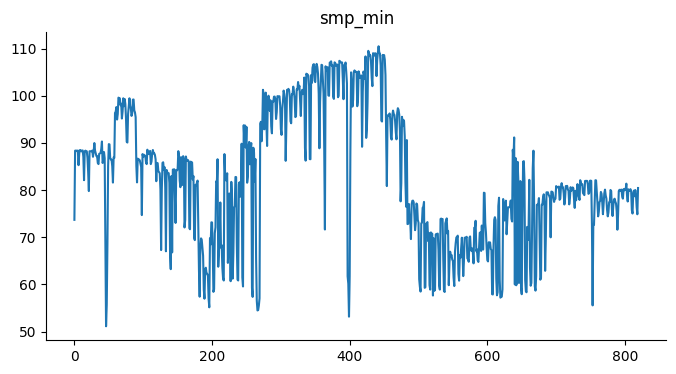

In [ ]:
# @title smp_min

from matplotlib import pyplot as plt
smp['smp_min'].plot(kind='line', figsize=(8, 4), title='smp_min')
plt.gca().spines[['top', 'right']].set_visible(False)

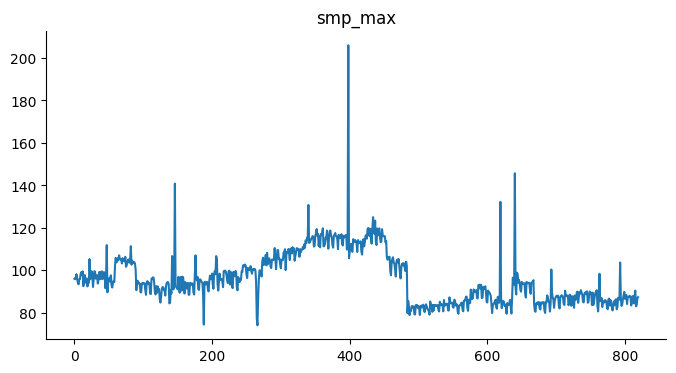

In [ ]:
# @title smp_max

from matplotlib import pyplot as plt
smp['smp_max'].plot(kind='line', figsize=(8, 4), title='smp_max')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
smp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      820 non-null    object 
 1   smp_max   820 non-null    float64
 2   smp_min   820 non-null    float64
 3   smp_mean  820 non-null    float64
dtypes: float64(3), object(1)
memory usage: 25.8+ KB


#### 데이터 탐색 및 전처리

- 날짜 데이터 변환

In [ ]:
smp.date = pd.to_datetime(smp.date)

In [ ]:
smp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      820 non-null    datetime64[ns]
 1   smp_max   820 non-null    float64       
 2   smp_min   820 non-null    float64       
 3   smp_mean  820 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 25.8 KB


In [ ]:
smp['day_of_week'] = smp.date.dt.dayofweek
smp.head()

,date,smp_max,smp_min,smp_mean,day_of_week
0,2018-01-01,95.93,73.69,84.88,0
1,2018-01-02,95.70,88.36,92.57,1
2,2018-01-03,96.47,88.37,92.34,2
3,2018-01-04,98.09,88.37,92.14,3
4,2018-01-05,96.12,88.23,92.42,4


In [ ]:
smp.day_of_week.value_counts().sort_index()

day_of_week
0    118
1    118
2    117
3    117
4    117
5    116
6    117
Name: count, dtype: int64

- 요일 데이터 원핫인코딩

In [ ]:
smp = pd.get_dummies(smp, columns=['day_of_week'],
                     prefix='X', drop_first=True, dtype=int)
smp.head()

,date,smp_max,smp_min,smp_mean,X_1,X_2,X_3,X_4,X_5,X_6
0,2018-01-01,95.93,73.69,84.88,0,0,0,0,0,0
1,2018-01-02,95.70,88.36,92.57,1,0,0,0,0,0
2,2018-01-03,96.47,88.37,92.34,0,1,0,0,0,0
3,2018-01-04,98.09,88.37,92.14,0,0,1,0,0,0
4,2018-01-05,96.12,88.23,92.42,0,0,0,1,0,0


- 전력량 시계열 데이터 시각화 : 선그래프

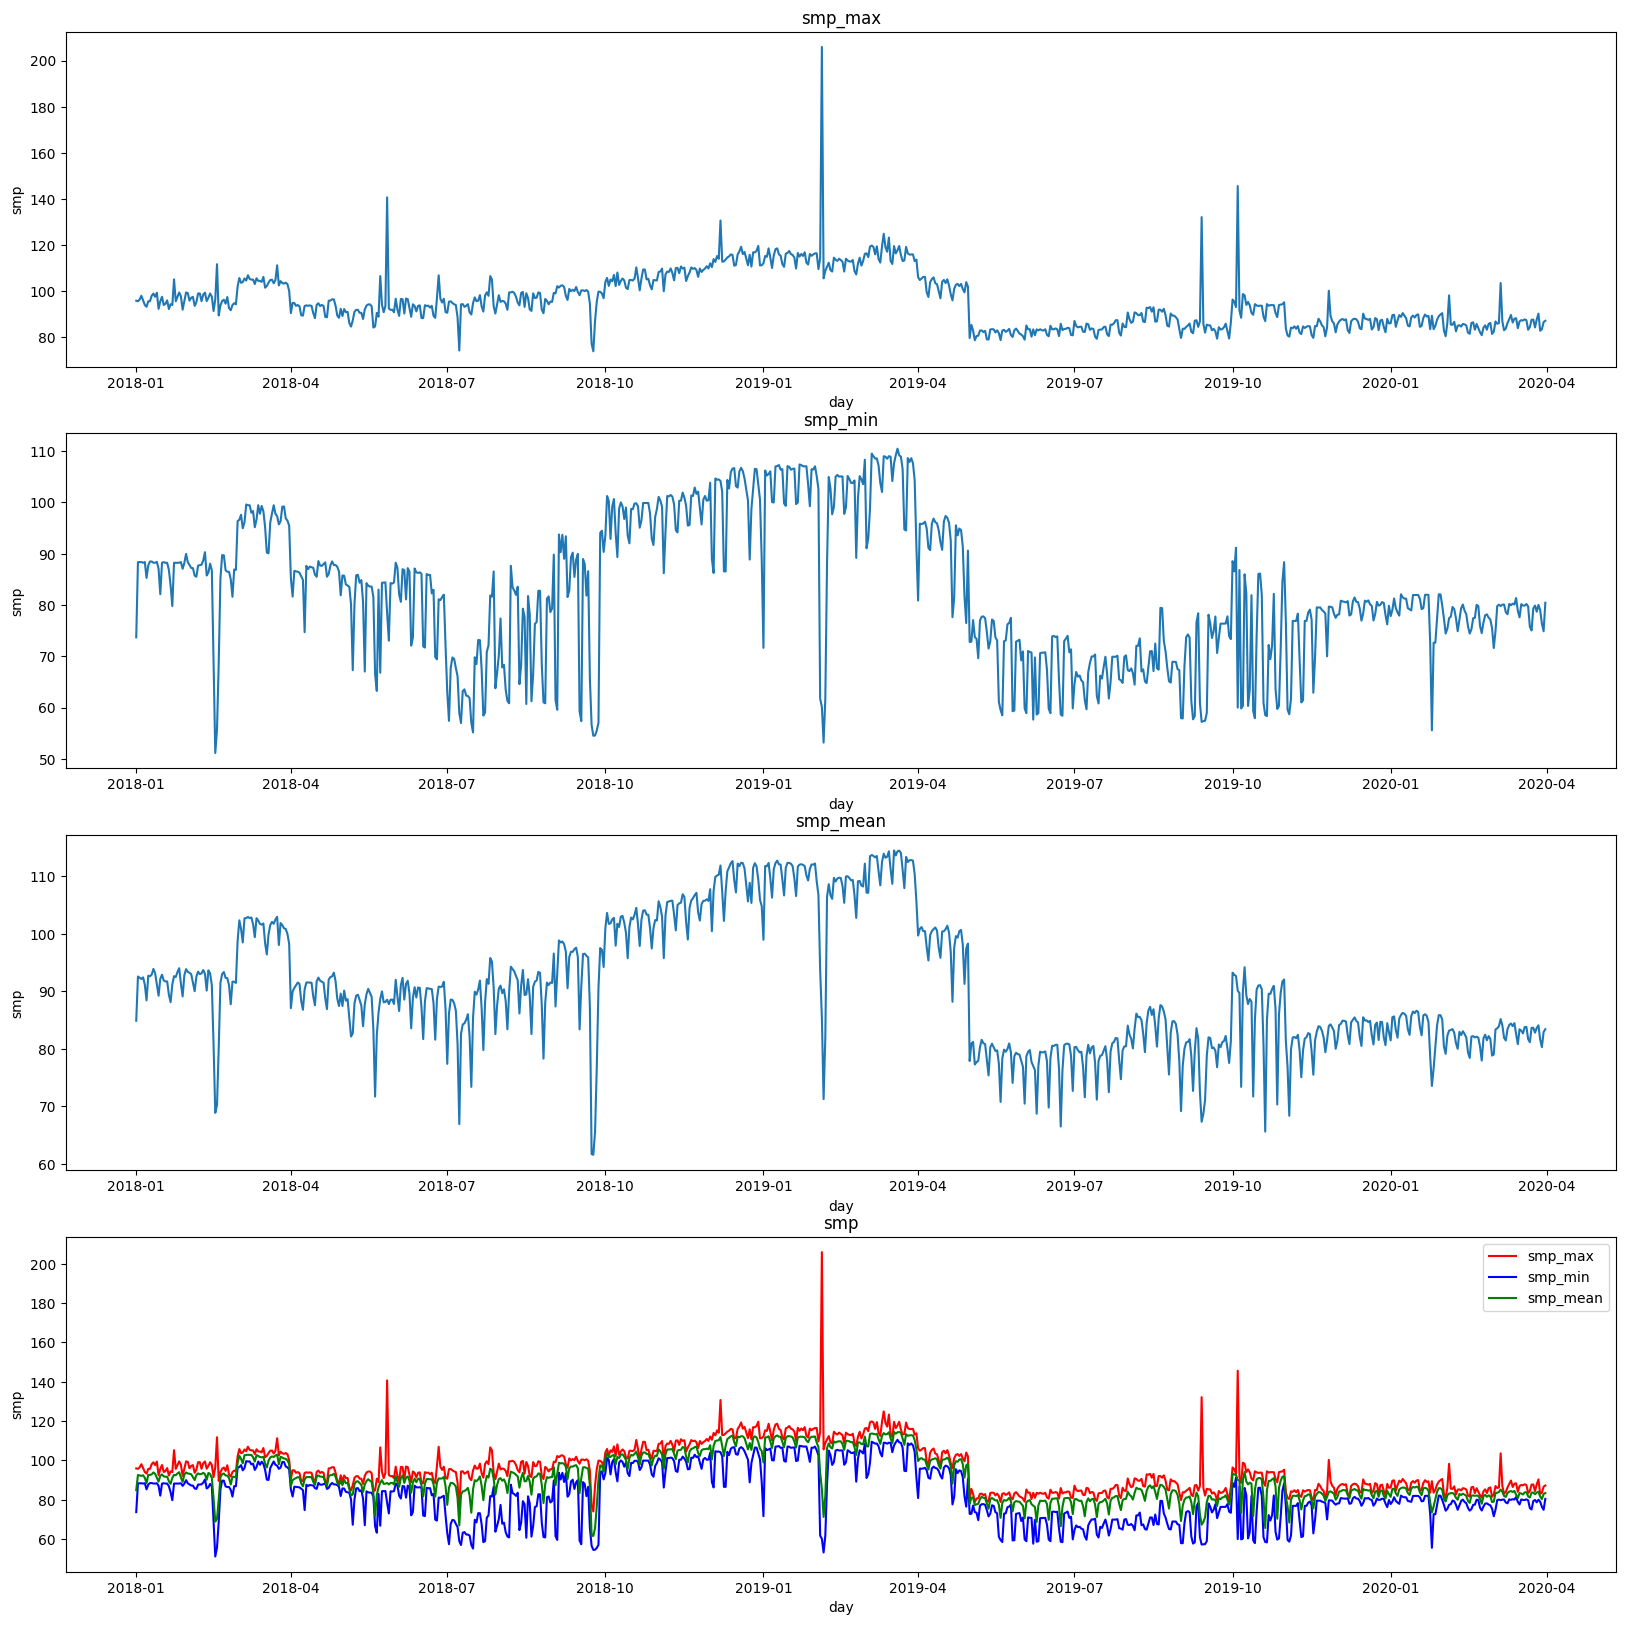

In [ ]:
fig, axs = plt.subplots(figsize=(20, 20), nrows=4, ncols=1)
axs[0].plot(smp.date, smp.smp_max)
axs[0].set_title('smp_max')
axs[0].set_xlabel('day')
axs[0].set_ylabel('smp')

axs[1].plot(smp.date, smp.smp_min)
axs[1].set_title('smp_min')
axs[1].set_xlabel('day')
axs[1].set_ylabel('smp')

axs[2].plot(smp.date, smp.smp_mean)
axs[2].set_title('smp_mean')
axs[2].set_xlabel('day')
axs[2].set_ylabel('smp')

axs[3].plot(smp.date, smp.smp_max, label='smp_max', color='red')
axs[3].plot(smp.date, smp.smp_min, label='smp_min', color='blue')
axs[3].plot(smp.date, smp.smp_mean, label='smp_mean', color='green')
axs[3].set_title('smp')
axs[3].set_xlabel('day')
axs[3].set_ylabel('smp')
axs[3].legend()
plt.show()

In [ ]:
smp.describe()

,date,smp_max,smp_min,smp_mean,X_1,X_2,X_3,X_4,X_5,X_6
count,820,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,2019-02-15 01:36:35.121951232,95.994939,82.706195,90.879610,0.143902,0.142683,0.142683,0.142683,0.141463,0.142683
min,2018-01-01 00:00:00,74.020000,51.120000,61.590000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-07-24 18:00:00,86.315000,72.932500,82.047500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019-02-15 12:00:00,93.940000,81.520000,89.115000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019-09-08 06:00:00,104.185000,93.817500,100.237500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020-03-31 00:00:00,205.940000,110.490000,114.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,11.933520,13.900218,11.231344,0.351205,0.349963,0.349963,0.349963,0.348712,0.349963


#### 모델 학습을 위한 훈련/검증 데이터 준비

- 학습데이터: ~ 2019.12.31
- 검증데이터: 2020.01.01 ~
- 최근 10일 데이터를 학습하여 예측하는 날로부터 3일이 경과한 날의 SMP 가격 예측하는 모델

- 학습(훈련) 데이터

In [ ]:
train_split_idx = smp[smp.date == '2020-01-01'].index.values[0]
print(f'훈련데이터와 검증데이터 분할 기준 index = {train_split_idx}')

훈련데이터와 검증데이터 분할 기준 index = 729


In [ ]:
window_size = 10
future = 3

X_train = smp.iloc[:train_split_idx-window_size-future, :] # 729-10-3 [:716, :]
y_train = smp.iloc[window_size+future:train_split_idx, [3]] # [13:729, [1]]

print(X_train.shape, y_train.shape)

(716, 10) (716, 1)


In [ ]:
X_train.head()

,date,smp_max,smp_min,smp_mean,X_1,X_2,X_3,X_4,X_5,X_6
0,2018-01-01,95.93,73.69,84.88,0,0,0,0,0,0
1,2018-01-02,95.70,88.36,92.57,1,0,0,0,0,0
2,2018-01-03,96.47,88.37,92.34,0,1,0,0,0,0
3,2018-01-04,98.09,88.37,92.14,0,0,1,0,0,0
4,2018-01-05,96.12,88.23,92.42,0,0,0,1,0,0


In [ ]:
y_train.head(5)

,smp_mean
13,89.23
14,92.17
15,92.88
16,91.88
17,91.72


- 테스트 데이터

In [ ]:
test_start = train_split_idx-window_size-future
test_end = smp.shape[0] - window_size-future

X_test = smp.iloc[test_start:test_end, :] # 729-10-3 [:716, :]
y_test = smp.iloc[train_split_idx:, [3]] # [13:729, [1]]

print(X_test.shape, y_test.shape)

(716, 10) (716, 1)


In [ ]:
X_test.head()

,date,smp_max,smp_min,smp_mean,X_1,X_2,X_3,X_4,X_5,X_6
716,2019-12-19,87.62,80.90,84.64,0,0,1,0,0,0
717,2019-12-20,88.08,80.12,84.86,0,0,0,1,0,0
718,2019-12-21,83.45,79.85,82.37,0,0,0,0,1,0
719,2019-12-22,84.47,76.97,80.76,0,0,0,0,0,1
720,2019-12-23,88.43,78.22,84.16,0,0,0,0,0,0


In [ ]:
y_test.head()

,smp_mean
729,81.46
730,85.51
731,85.63
732,83.26
733,81.95


In [ ]:
X_train_scaled = X_train.iloc[:, 1:] #첫 컬럼 date 빼주기
X_test_scaled = X_test.iloc[:, 1:] #smp_max만 남겨줌

#### 데이터 정규화

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_tr = scaler.fit_transform(X_train_scaled)
X_ts = scaler.transform(X_test_scaled)

#### Mini Batch 크기로 시계열을 변환

In [ ]:
from keras.utils import timeseries_dataset_from_array

batch_size = 16
window_size = 10

train_ds = timeseries_dataset_from_array(X_tr, y_train, batch_size=batch_size,
                                        sequence_length=window_size)

test_ds = timeseries_dataset_from_array(X_ts, y_test, batch_size=batch_size,
                                       sequence_length=window_size)

for x, y in train_ds:
    print(x.shape, y.shape)
    break #(16,10,9) -> 16은 batch_size에 따라 달라짐

(16, 10, 9) (16, 1)


#### 모델 빌드 및 컴파일

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Input

model = Sequential()
model.add(Input(shape=(window_size, 9)))
model.add(LSTM(units = 32))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 32)                5376      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5409 (21.13 KB)
Trainable params: 5409 (21.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

#### 모델 훈련

In [ ]:
history = model.fit(train_ds, epochs=500, validation_data=test_ds, verbose=0)

In [ ]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [ ]:
def draw_loss_mae_plot(history):
    keys = list(history.history.keys())
    metrics = [('loss', 'val_loss'), ('mae', 'val_mae') if 'mae' in keys else ('accuracy', 'val_accuracy')]
    titles = ['Loss', 'MAE' if 'mae' in keys else 'Accuracy']

    plt.figure(figsize=(10, 5))
    for i, (train_key, val_key) in enumerate(metrics):
        plt.subplot(1, 2, i + 1)
        plt.plot(history.history[train_key], label='Train')
        plt.plot(history.history[val_key], label='Validation')
        plt.xlabel('Epoch')
        plt.ylabel(titles[i])
        plt.title(f'{titles[i]} Plot')
        plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
def draw_loss_val_plot2(history, title=['loss','accuracy']):
    keys = list(history.history.keys())
    title = ['Loss', 'MAE']
    fig, axs = plt.subplots(figsize=(10,5), nrows=1, ncols=2)
    for i,val in enumerate(title):
        axs[i].plot(history.history[keys[i]], label='trian')
        axs[i].plot(history.history[keys[i+2]], label='validation')
        axs[i].set_xlabel('epoch')
        axs[i].set_ylabel(val)
        axs[i].set_title(val + ' plot')
        axs[i].legend()
    plt.show()

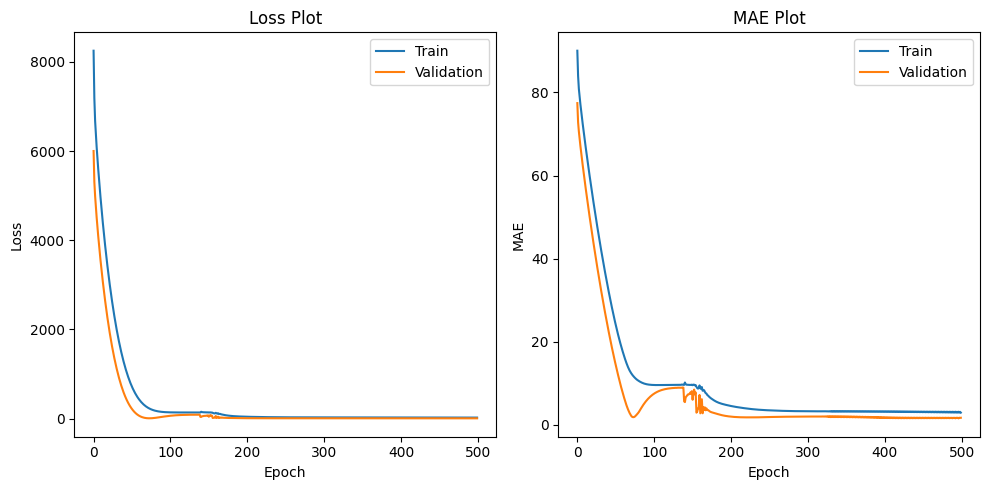

In [ ]:
draw_loss_mae_plot(history)

#### 예측

In [ ]:
y_pred = model.predict(test_ds)
y_pred.shape

6/6 [==============================] - 0s 2ms/step


(82, 1)

#### 예측값 시각화

In [ ]:
len(y_test)

91

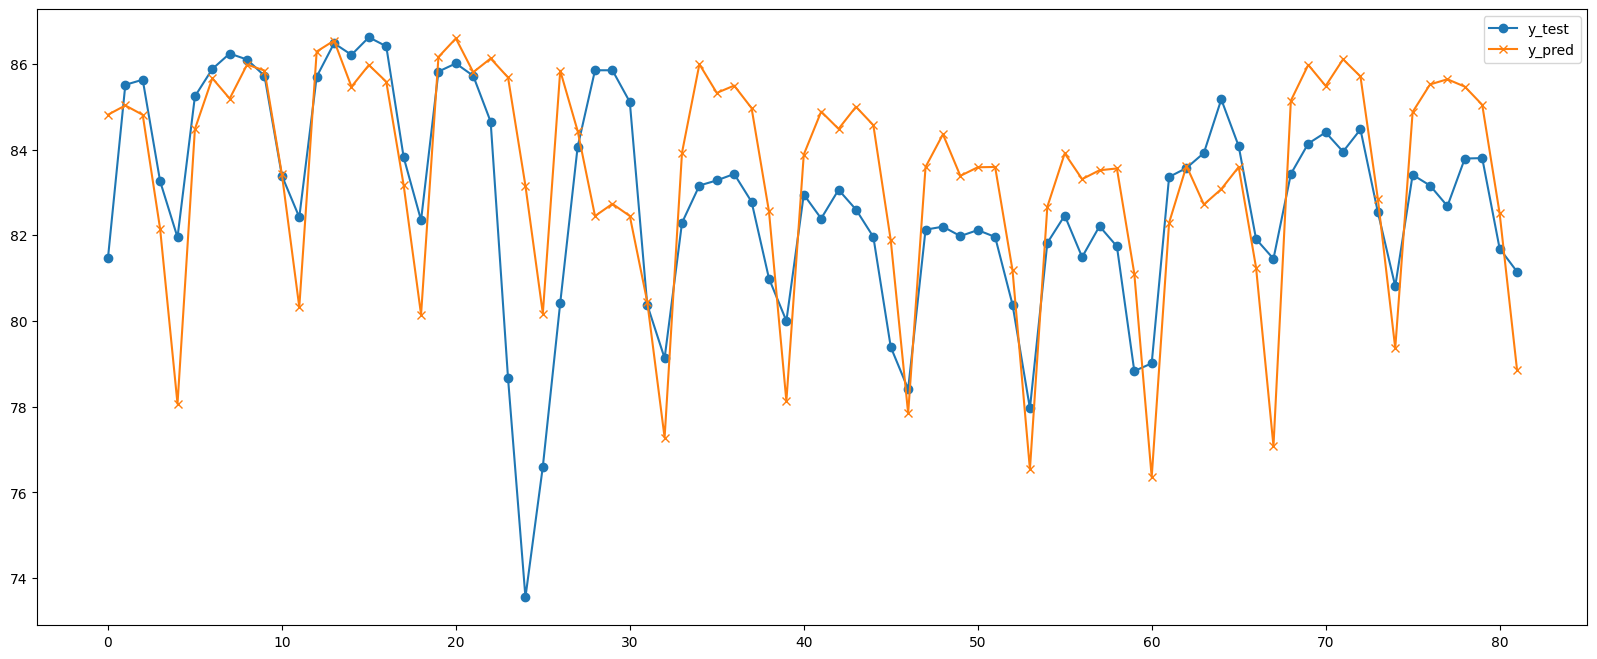

In [ ]:
plt.figure(figsize=(20,8))
x = range(len(y_pred))
plt.plot(x, y_test[:-(window_size-1)], marker='o', label='y_test')
plt.plot(x, y_pred, marker='x', label='y_pred')
plt.legend()
plt.show()

-----